In [2]:
import numpy as np #linear algebra
import pandas as pd # Data processing, I/0 operations
import matplotlib.pyplot as plt #plotting
import seaborn as sns

%matplotlib inline

In [4]:
db = pd.read_csv("D:/csv/diabetes.csv")

In [5]:
db.shape

(768, 9)

In [6]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
db.isnull().values.any()

False

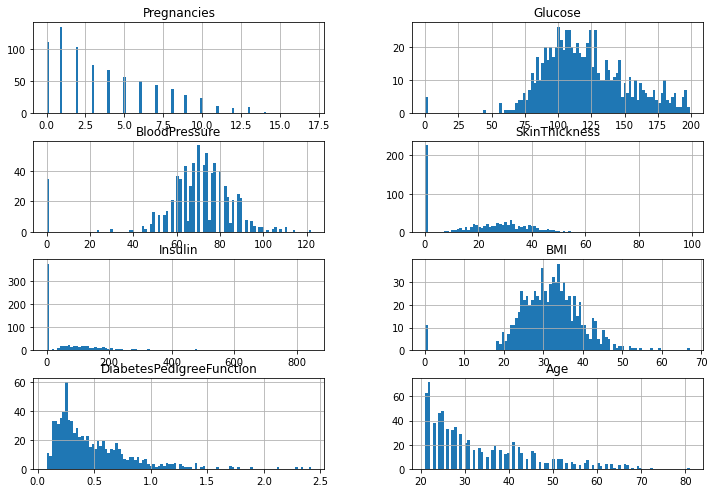

In [8]:
columns = list(db)[0:-1]
db[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2))
plt.show()

### Correlation

In [9]:
db.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

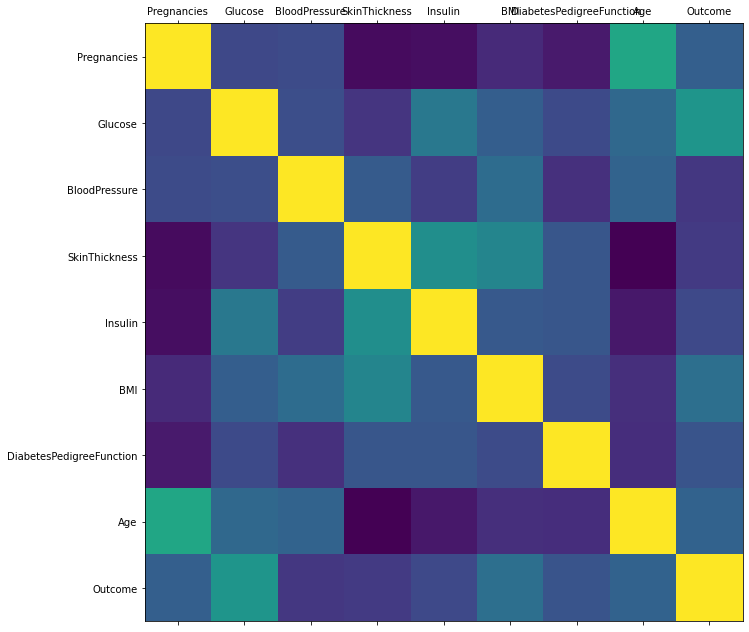

In [11]:
plot_corr(db)

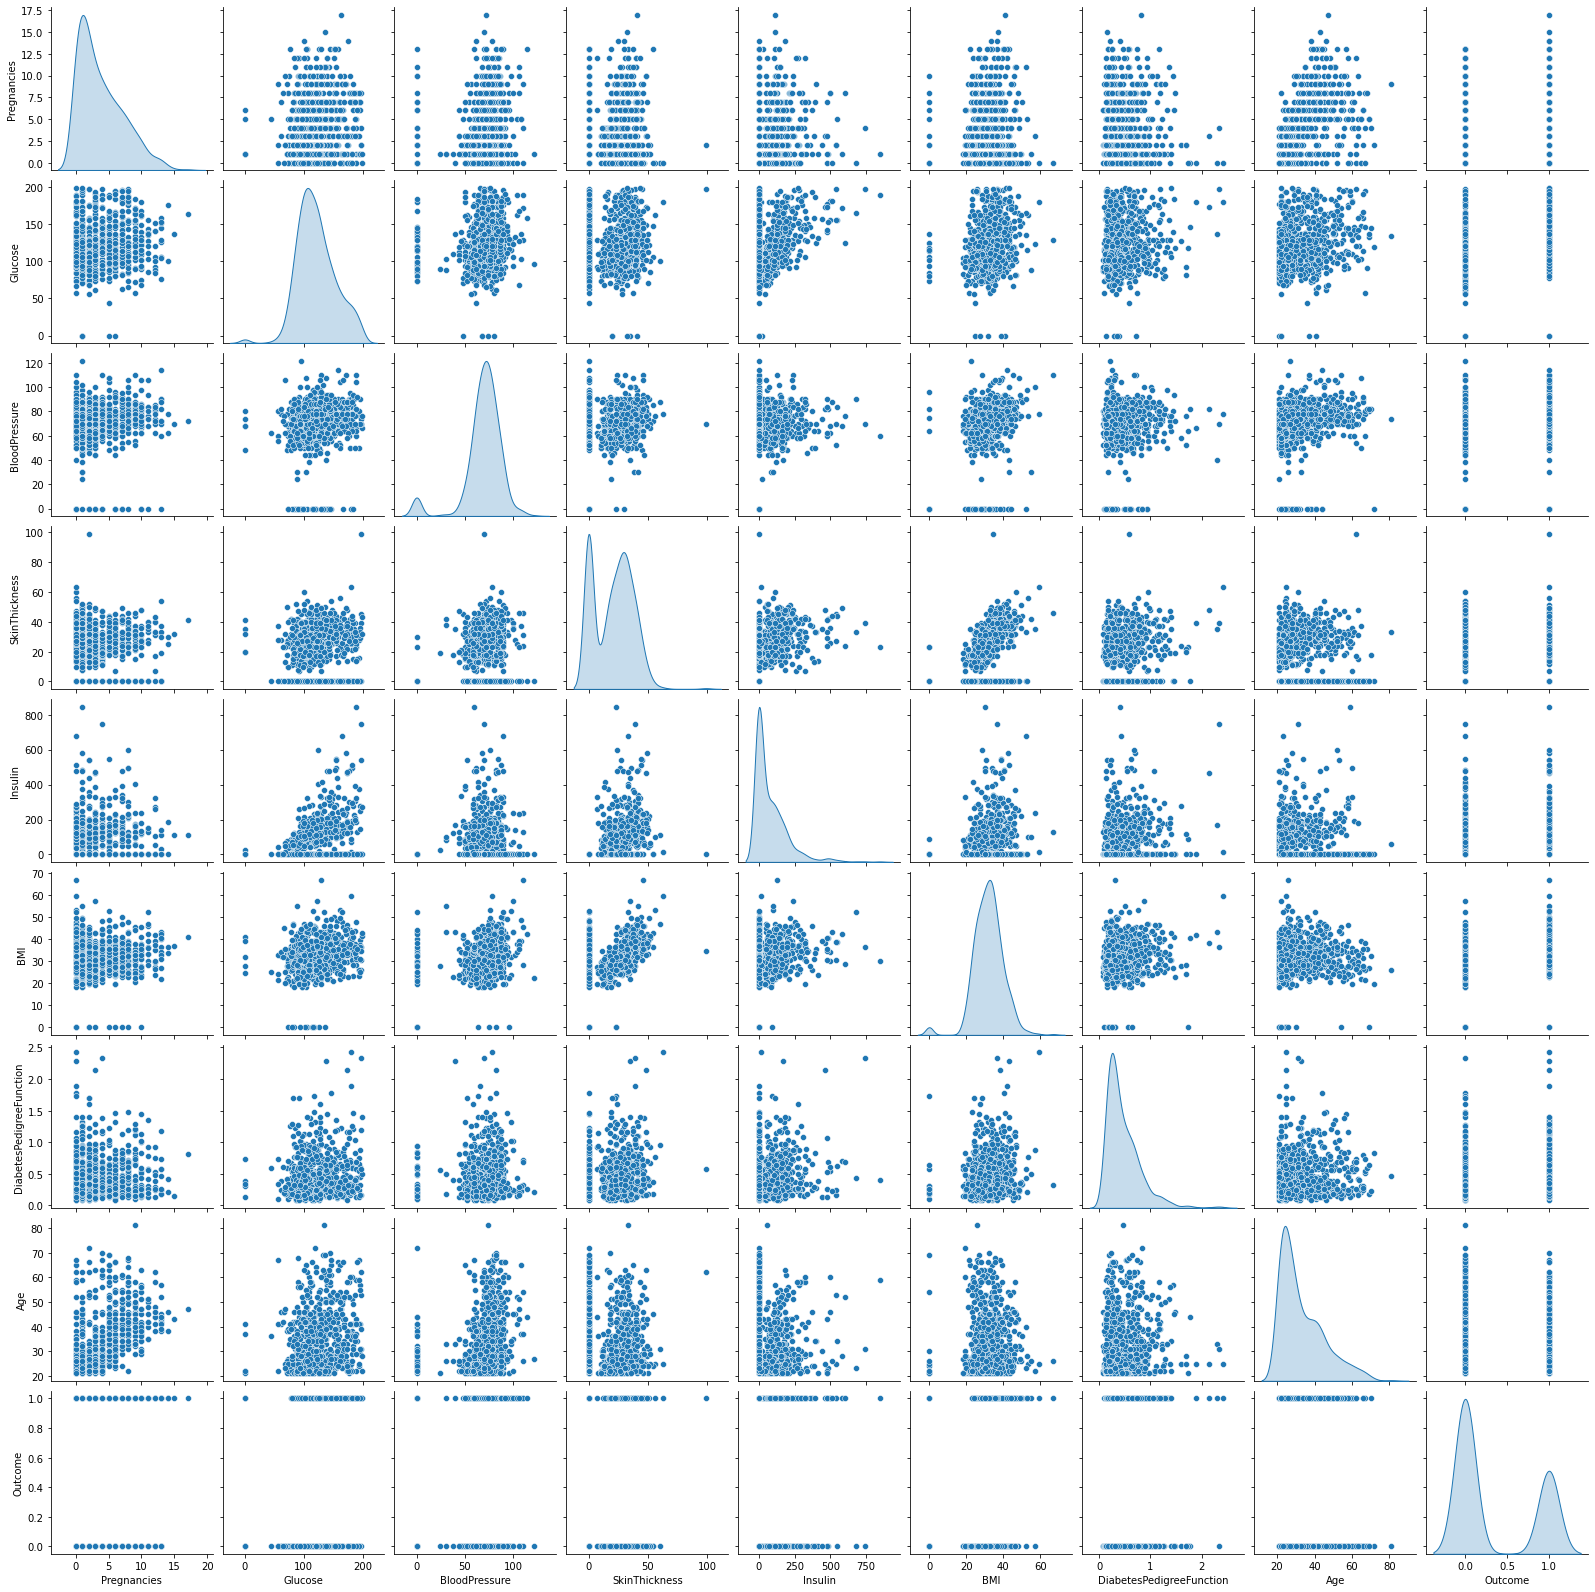

In [12]:
sns.pairplot(db, diag_kind='kde')

In [13]:
n_true = len(db.loc[db['Outcome']==True])
n_false = len(db.loc[db['Outcome']==False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, ((n_true/(n_true+n_false))*100)))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, ((n_false/(n_true+n_false))*100)))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


In [14]:
from sklearn.model_selection import train_test_split
X = db.drop('Outcome', axis=1)
Y = db['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1) # 70-30 data split
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [16]:
print("{0:0.2f}% data in the training set".format((len(x_train)/len(db.index))*100))
print("{0:0.2f}% data in the test set".format((len(x_test)/len(db.index))*100))

69.92% data in the training set
30.08% data in the test set


In [17]:
print("Original Diabetes True values: {0} ({1:0.2f}%)".format(len(db.loc[db['Outcome']==1]), 
      (len(db.loc[db['Outcome']==1])/len(db.index))*100))

print("Original Diabetes False values: {0} ({1:0.2f}%)".format(len(db.loc[db['Outcome']==0]), 
      (len(db.loc[db['Outcome']==0])/len(db.index))*100))

Original Diabetes True values: 268 (34.90%)
Original Diabetes False values: 500 (65.10%)


In [18]:
print("Training Diabetes true values: {0} ({1:0.2f}%)".format(len(y_train[y_train[:]==1]), 
      (len(y_train[y_train[:]==1])/len(y_train))*100))

print("Training Diabetes False values: {0} ({1:0.2f}%)".format(len(y_train[y_train[:]==0]), 
      (len(y_train[y_train[:]==0])/len(y_train))*100))

Training Diabetes true values: 183 (34.08%)
Training Diabetes False values: 354 (65.92%)


In [19]:
print("Test Diabetes true values: {0} ({1:0.2f}%)".format(len(y_test[y_test[:]==1]), 
      (len(y_test[y_test[:]==1])/len(y_test))*100))

print("Test Diabetes False values: {0} ({1:0.2f}%)".format(len(y_test[y_test[:]==0]), 
      (len(y_test[y_test[:]==0])/len(y_test))*100))

Test Diabetes true values: 85 (36.80%)
Test Diabetes False values: 146 (63.20%)


### Finalize the dataset

In [20]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols = x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

In [21]:
x_train.columns = cols
x_test.columns = cols

In [22]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


## Build and train Naive Bayes algorithm

In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train.ravel())

GaussianNB()

In [24]:
model_predict = model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_train, model_predict)))

Model Accuracy: 0.7393


### Perfomance of our model on testing data

In [25]:
model_test_predict = model.predict(x_test)

print("Model Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, model_test_predict)))

Model Accuracy: 0.7706


### Confusion matrix

Confusion Matrix


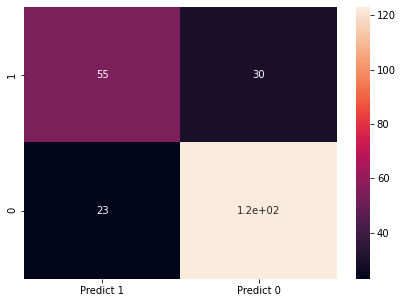

In [26]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, model_test_predict, labels=[1,0])
data_cm = pd.DataFrame(cm, index = [i for i in ['1', '0']],
                      columns=[i for i in ['Predict 1', 'Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(data_cm, annot=True)
plt.show()

In [27]:
print("Classification report")
print(metrics.classification_report(y_test, model_test_predict, labels=[1,0]))

Classification report
              precision    recall  f1-score   support

           1       0.71      0.65      0.67        85
           0       0.80      0.84      0.82       146

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

